In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('/content/drive/MyDrive/KDT 시즌2/8. 머신러닝 딥러닝/과제/data/train.csv')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [55]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


| 변수명    | 설명                            | 데이터 타입 |
|-----------|---------------------------------|-------------|
| age       | 고객의 나이                     | int64       |
| job       | 고객의 직업/고용상태             | object      |
| marital   | 고객의 혼인상태                 | object      |
| education | 고객이 달성한 교육 수준          | object      |
| default   | 고객이 기본적으로 신용을 가지고 있는지 여부 | object      |
| balance   | 고객계좌 잔액                   | int64       |
| housing   | 고객의 주택대출 유무            | object      |
| loan      | 고객의 개인대출 유무            | object      |
| contact   | 고객과 접촉하기 위해 사용되는 통신 유형 | object      |
| day       | 고객에게 마지막으로 연락한 달의 요일 | int64       |
| month     | 마지막으로 연락한 달             | object      |
| duration  | 이전 캠페인 동안 고객과 마지막으로 접촉한 기간(초) | int64       |
| campaign  | 현재 캠페인에서 고객에게 연락한 횟수 | int64       |
| pdays     | 이전 캠페인에서 연락 후 경과한 일수 | int64       |
| previous  | 이전 캠페인에서 고객에게 연락한 횟수 | int64       |
| poutcome  | 지난 마케팅 캠페인의 성과         | object      |
| y         | 고객의 응답 여부                 | object      |


In [56]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# age 시각화
- 카테고리가 정확히 나와있는 컬럼이 아니라 bar보다는 lineplot을 이용하여 시각화해주었다.

<Axes: xlabel='age', ylabel='y'>

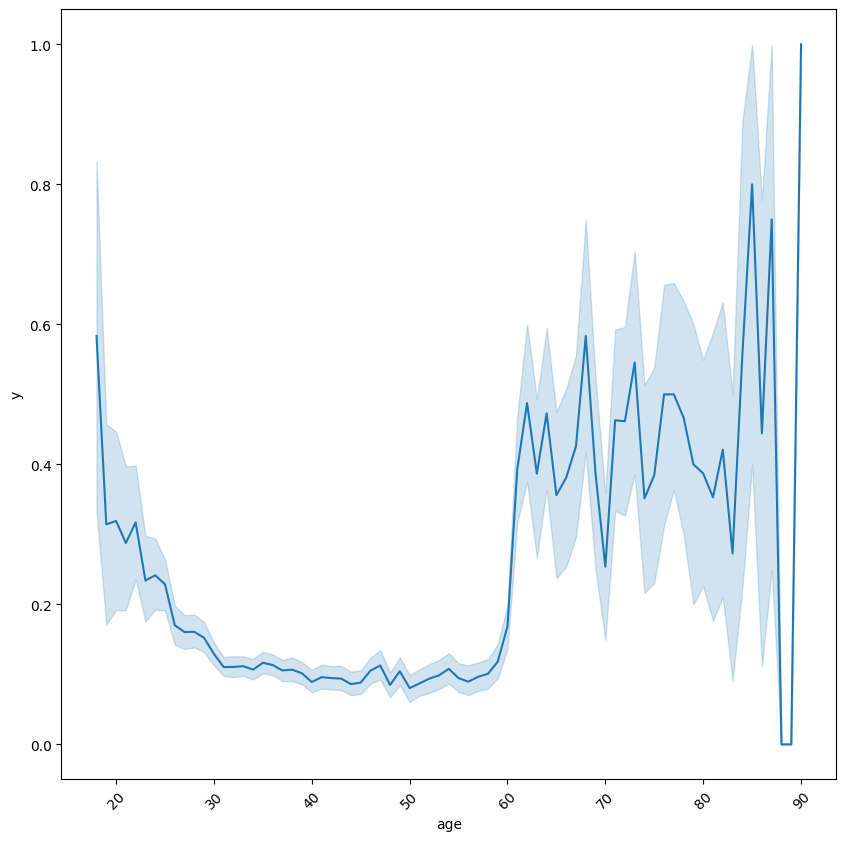

In [89]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=45)
sns.lineplot(x=df['age'], y=df['y'] )

<Axes: >

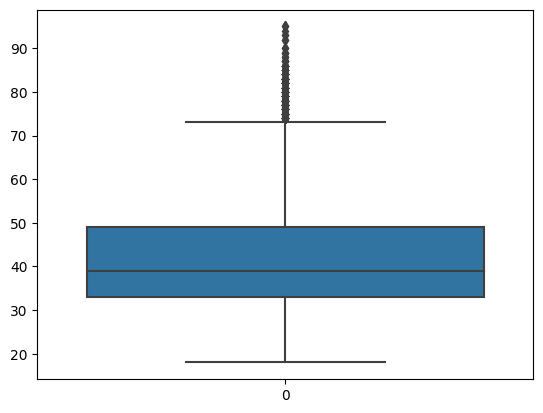

In [76]:
sns.boxplot(df['age'])

In [85]:
df = df[df['age'] <= 90]

<Axes: xlabel='age', ylabel='y'>

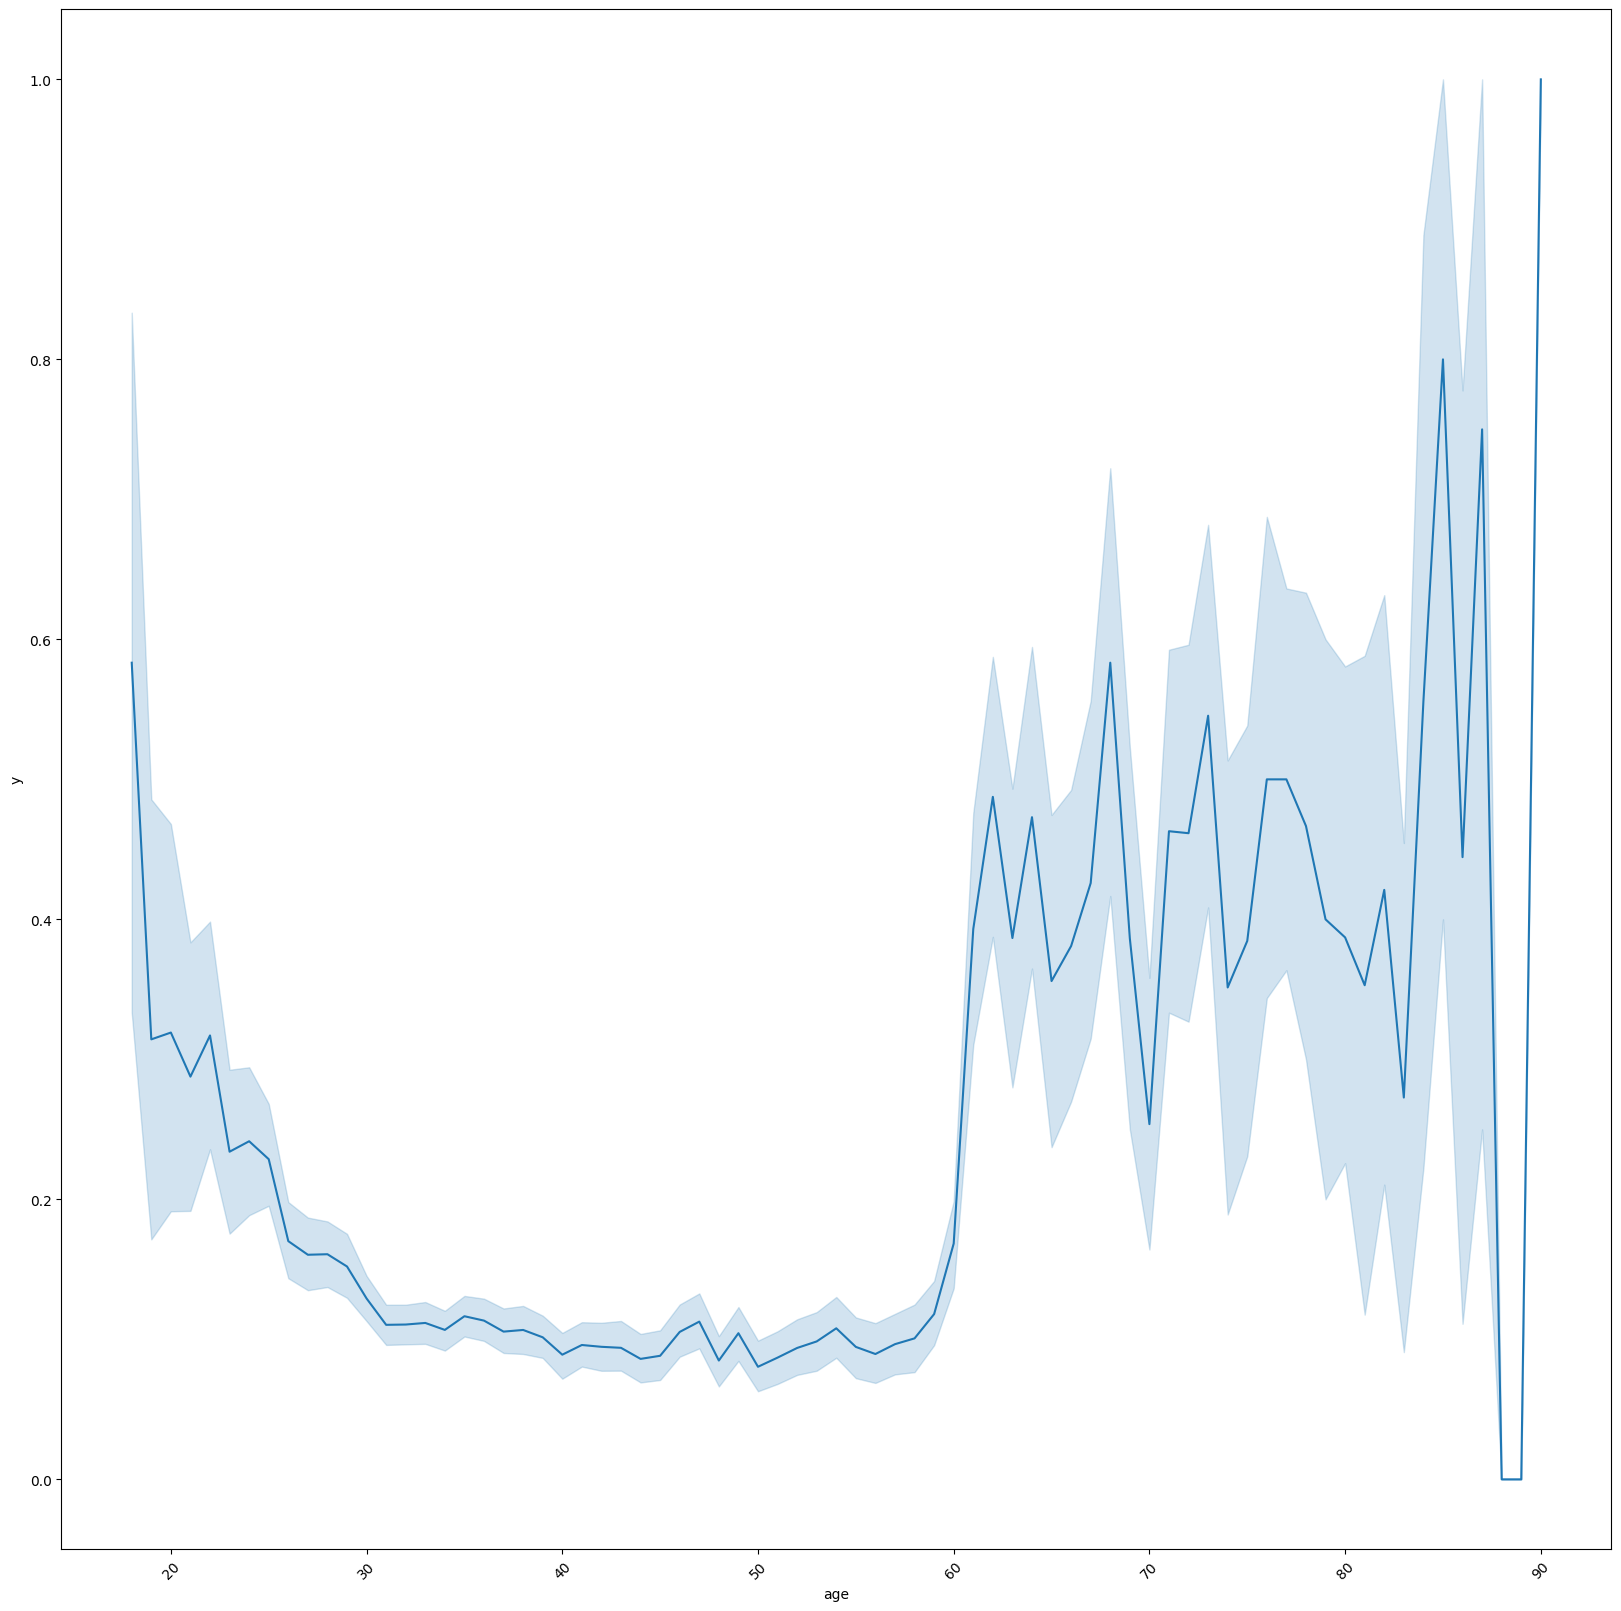

In [86]:
plt.figure(figsize=(20, 20))
plt.xticks(rotation=45)
sns.lineplot(x=df['age'], y=df['y'] )

In [93]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

1. **'management'** - 경영자
2. **'technician'** - 기술자, 기술 직종 종사자
3. **'entrepreneur'** - 기업가, 사업가
4. **'blue-collar'** - 노동자, 근로자 (일반적으로 물리적인 노동에 종사하는 직종을 가리킴)
5. **'unknown'** - 알려지지 않은, 불명확한
6. **'retired'** - 은퇴한, 퇴직한
7. **'admin.'** - 행정직, 사무직 (일반적으로 행정 및 사무 업무에 종사하는 직종을 가리킴)
8. **'services'** - 서비스업 종사자
9. **'self-employed'** - 자영업자, 자립한 종사자
10. **'unemployed'** - 실직자, 일자리가 없는
11. **'housemaid'** - 가정부, 가사부 (집안일을 도우며 생활하는 직업)
12. **'student'** - 학생

### 아래 표를 보면 은퇴한 사람이나 학생이 응답률이 제일 높은걸 확인할 수 있다.

<Axes: xlabel='job', ylabel='y'>

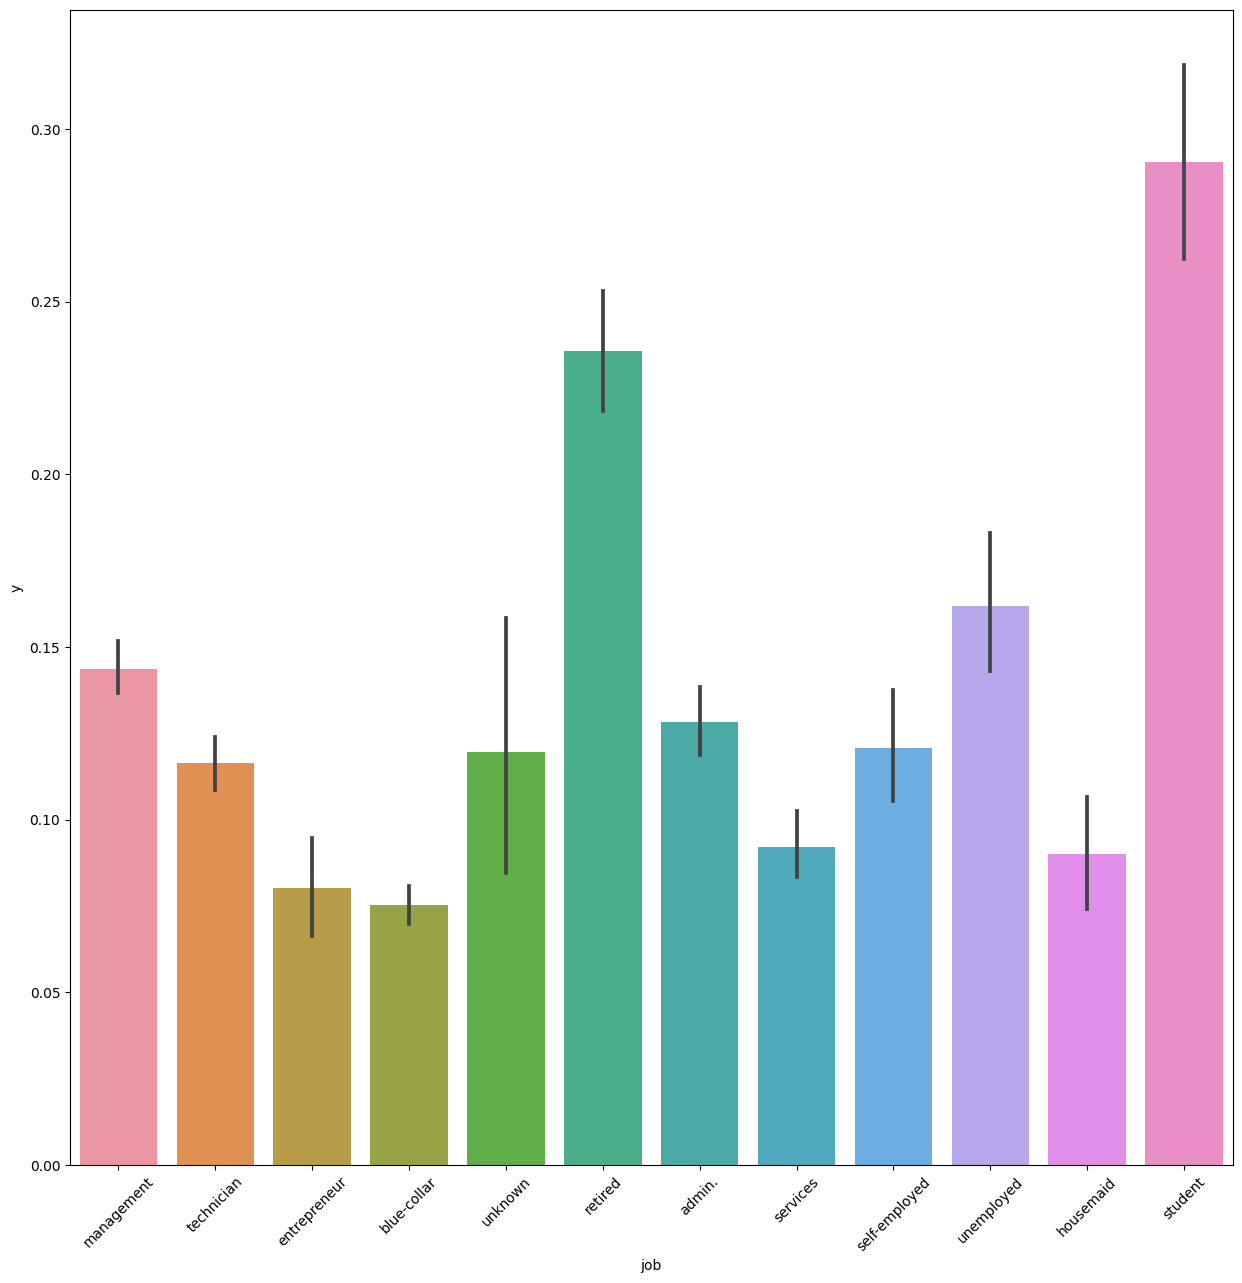

In [92]:
plt.figure(figsize=(15, 15))
plt.xticks(rotation=45)
sns.barplot(x=df['job'], y=df['y'] )

1. **'married'** - 기혼자
2. **'single'** - 미혼자
3. **'divorced'** - 이혼자

<Axes: xlabel='marital', ylabel='y'>

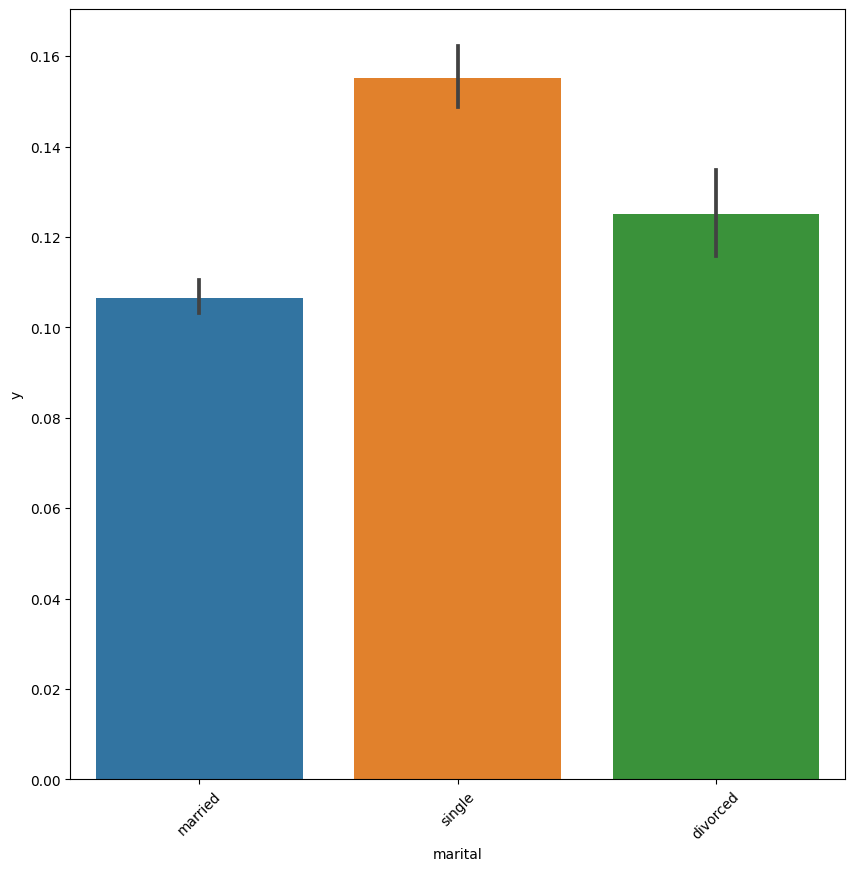

In [94]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=45)
sns.barplot(x=df['marital'], y=df['y'] )

<Axes: >

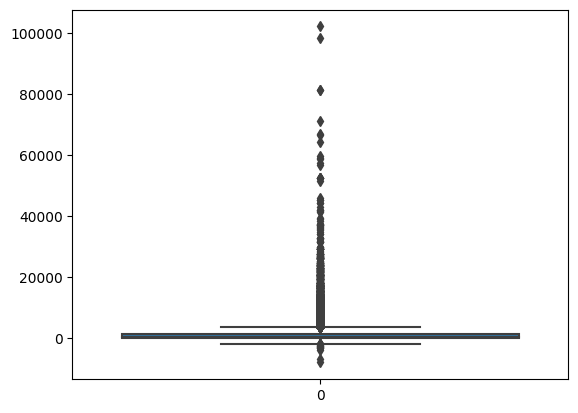

In [57]:
sns.boxplot(df['balance'])

In [58]:
# balance -값 전부 삭제
df = df[df['balance'] >= 0]

In [59]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,41.068500,1514.924744,15.748872,258.714344,2.749041,40.641597,0.596091
std,10.738871,3133.829437,8.296515,258.172195,3.061182,100.132497,2.355774
min,18.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,146.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,542.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,49.000000,1596.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<Axes: >

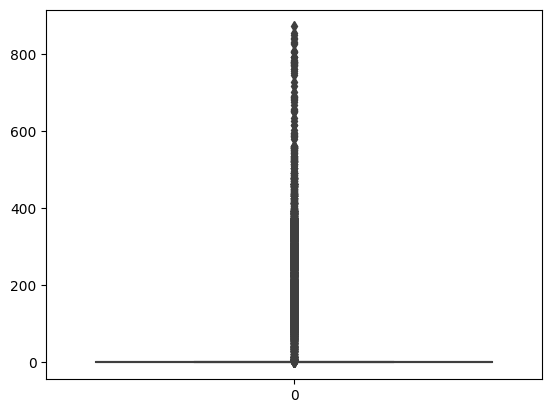

In [60]:
sns.boxplot(df['pdays'])

<Axes: >

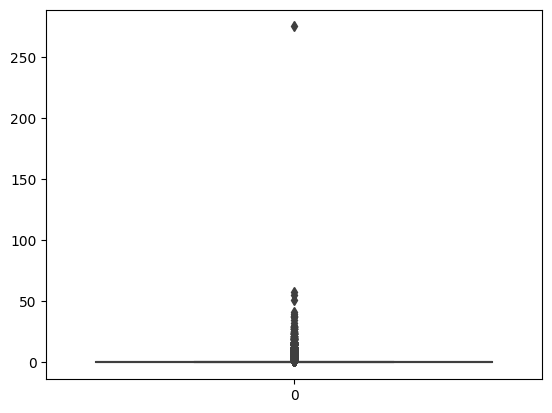

In [61]:
sns.boxplot(df['previous'])

In [62]:
# previous : 이전 캠페인에서 고객에게 연락한 횟수를 찍어봤더니 이상치가 나와 삭제
df = df[df['previous'] <= 250]

In [63]:
for i in df.columns:
    if df[i].dtype == 'O':
        print(i, df[i].nunique())
        print(i, df[i].unique())

job 12
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital 3
marital ['married' 'single' 'divorced']
education 4
education ['tertiary' 'secondary' 'unknown' 'primary']
default 2
default ['no' 'yes']
housing 2
housing ['yes' 'no']
loan 2
loan ['no' 'yes']
contact 3
contact ['unknown' 'cellular' 'telephone']
month 12
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome 4
poutcome ['unknown' 'failure' 'other' 'success']
y 2
y ['no' 'yes']


In [64]:
# 라벨인코딩
# default, housing, loan, y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label = ['default', 'housing', 'loan', 'y']

for i in label:
    df[i] = le.fit_transform(df[i])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41444 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41444 non-null  int64 
 1   job        41444 non-null  object
 2   marital    41444 non-null  object
 3   education  41444 non-null  object
 4   default    41444 non-null  int64 
 5   balance    41444 non-null  int64 
 6   housing    41444 non-null  int64 
 7   loan       41444 non-null  int64 
 8   contact    41444 non-null  object
 9   day        41444 non-null  int64 
 10  month      41444 non-null  object
 11  duration   41444 non-null  int64 
 12  campaign   41444 non-null  int64 
 13  pdays      41444 non-null  int64 
 14  previous   41444 non-null  int64 
 15  poutcome   41444 non-null  object
 16  y          41444 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.7+ MB


In [66]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


<ipython-input-71-9500dbe6590f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)


<Axes: >

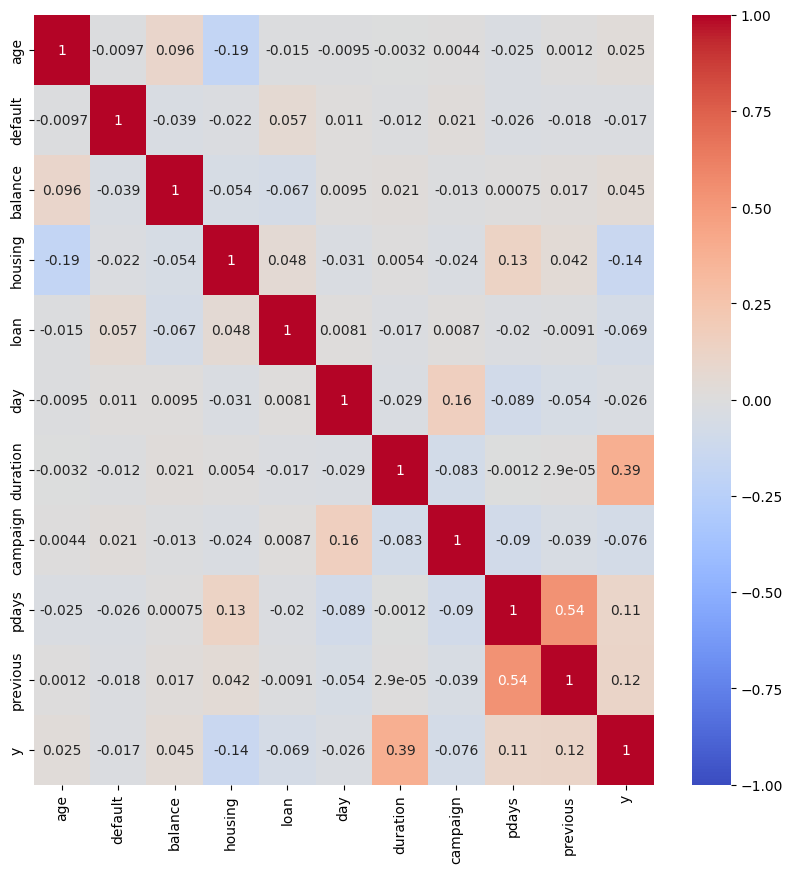

In [71]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)

In [101]:
df=pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41437 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  41437 non-null  int64
 1   default              41437 non-null  int64
 2   balance              41437 non-null  int64
 3   housing              41437 non-null  int64
 4   loan                 41437 non-null  int64
 5   day                  41437 non-null  int64
 6   duration             41437 non-null  int64
 7   campaign             41437 non-null  int64
 8   pdays                41437 non-null  int64
 9   previous             41437 non-null  int64
 10  y                    41437 non-null  int64
 11  job_admin.           41437 non-null  uint8
 12  job_blue-collar      41437 non-null  uint8
 13  job_entrepreneur     41437 non-null  uint8
 14  job_housemaid        41437 non-null  uint8
 15  job_management       41437 non-null  uint8
 16  job_retired          4

In [103]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


# 학습

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], test_size=0.2, random_state=2023)

In [106]:
X_train.shape, y_train.shape

((33149, 48), (33149,))

In [107]:
X_test.shape, y_test.shape

((8288, 48), (8288,))

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

In [112]:
models = {
    "Linear Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Light Gradient Boosting": LGBMClassifier()
}
# Train and evaluate the models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    roc_score = roc_auc_score(y_test, predictions)
    results[name] = roc_score
results

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 4015, number of negative: 29134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 33149, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.121120 -> initscore=-1.981869
[LightGBM] [Info] Start training from score -1.981869


{'Linear Regression': 0.6017546705895922,
 'Decision Tree': 0.7128865075107331,
 'Random Forest': 0.6866323489052527,
 'Support Vector Machine': 0.5046402519701166,
 'Light Gradient Boosting': 0.7302260423895934}

# 하이퍼 파라미터 최적값 찾기

In [113]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [126]:
params = {
    'n_estimators': [50, 100, 200, 300, 500],  # 트리의 개수
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # 학습률
    'max_depth': [3, 5, 7, 9, -1],  # 최대 깊이
    'num_leaves': [15, 31, 63, 127],  # 최대 리프 노드 수
    'min_child_samples': [10, 20, 30, 50],  # 리프 노드가 가져야 하는 최소 샘플 수
    'subsample': [0.7, 0.8, 0.9, 1.0],  # 샘플의 비율
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # 특성의 비율
    'reg_alpha': [0.0, 0.1, 0.5, 1.0],  # L1 정규화
    'reg_lambda': [0.0, 0.1, 0.5, 1.0]  # L2 정규화
}

In [127]:
lgbm = LGBMClassifier(random_state=2023)

In [128]:
rand_df = RandomizedSearchCV(lgbm, params, n_iter=10, random_state=2023)

In [129]:
rand_df.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3212, number of negative: 23307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 26519, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.121121 -> initscore=-1.981860
[LightGBM] [Info] Start training from score -1.981860
[LightGBM] [Info] Number of positive: 3212, number of negative: 23307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1022
[LightGBM] [Info] Number of data points in the train set: 26519, number of used features: 48
[LightGBM] [Info] [b

RandomizedSearchCV(estimator=LGBMClassifier(random_state=2023),
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 7, 9, -1],
                                        'min_child_samples': [10, 20, 30, 50],
                                        'n_estimators': [50, 100, 200, 300,
                                                         500],
                                        'num_leaves': [15, 31, 63, 127],
                                        'reg_alpha': [0.0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0.0, 0.1, 0.5, 1.0],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=2023)

In [130]:
rand_df.cv_results_

{'mean_fit_time': array([0.4019455 , 0.4168395 , 1.69163308, 1.31498785, 1.7794816 ,
        0.2747334 , 1.33143497, 0.48632102, 1.39907875, 0.33726215]),
 'std_fit_time': array([0.00823703, 0.01685199, 0.36031777, 0.15791164, 0.30532441,
        0.01514403, 0.05747772, 0.08675748, 0.31220274, 0.01486632]),
 'mean_score_time': array([0.04112606, 0.04043784, 0.17460971, 0.11179252, 0.19161129,
        0.02608571, 0.16976624, 0.04957566, 0.10832133, 0.02343612]),
 'std_score_time': array([0.00063949, 0.00185358, 0.01170424, 0.00368625, 0.01413803,
        0.00105175, 0.00322656, 0.00536375, 0.00585182, 0.00040125]),
 'param_subsample': masked_array(data=[1.0, 0.8, 0.9, 1.0, 0.8, 0.7, 1.0, 0.7, 0.9, 0.8],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_reg_lambda': masked_array(data=[0.1, 0.5, 0.1, 0.1, 0.0, 1.0, 0.0, 0.1, 0.1, 0.1],
              mask=[False, False, 

In [131]:
rand_df.best_params_

{'subsample': 1.0,
 'reg_lambda': 0.1,
 'reg_alpha': 1.0,
 'num_leaves': 63,
 'n_estimators': 500,
 'min_child_samples': 30,
 'max_depth': 3,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8}

In [132]:
lgbm = LGBMClassifier(subsample=1.0,reg_lambda=0.1,reg_alpha=1.0, num_leaves=63,n_estimators=500, min_child_samples=30, max_depth=3,learning_rate=0.1, colsample_bytree=0.8, random_state=2023)
rand_proba = rand_df.predict_proba(X_test)
roc_auc_score(y_test, rand_proba[:,1])

0.9323785179069041

In [133]:
from sklearn.metrics._plot.roc_curve import roc_curve

In [134]:
fpr, tpr, thr = roc_curve(y_test, rand_proba[:, 1])
print(fpr, tpr, thr)

[0.        0.        0.        ... 0.8142205 0.8142205 1.       ] [0.00000000e+00 9.44287063e-04 6.61000944e-03 ... 9.99055713e-01
 1.00000000e+00 1.00000000e+00] [1.98882922e+00 9.88829221e-01 9.64972689e-01 ... 1.36993614e-03
 1.36985508e-03 1.43166363e-05]


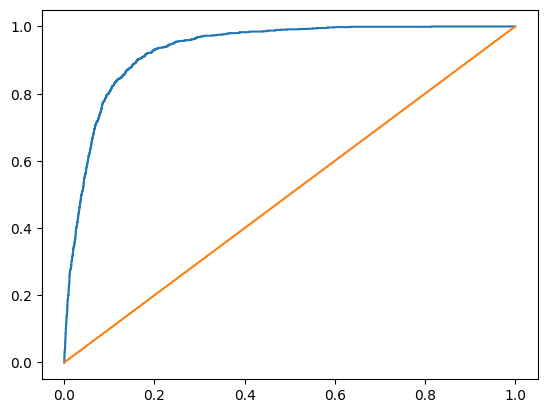

In [135]:
plt.plot(fpr,tpr, label='ROC Curve')
plt.plot([0,1],[0,1])
plt.show()